In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.pyplot import MultipleLocator

In [174]:
def split_bins(data_array,num):#return bins index
    d=np.ptp(data_array)/num
    datamin=np.amin(data_array)
    bins_index=[]
    for ii in range(0,num):
        #bins_data.append(data_array[(data_array>=d*ii+datamin)&(data_array<=d*(ii+1)+datamin)])
        bins_index.append((data_array>=d*ii+datamin)&(data_array<=d*(ii+1)+datamin))
    
    return bins_index

In [42]:
hdu1=fits.open('/Users/zjq/Downloads/master_DLA.fits')
#cut NHI(20.3-21.5),zdla with rsd,dlaid
nhi=hdu1[1].data['N_HI_DLA']
nhicut=(nhi>=20.3)&(nhi<=21.5)
nhi_dla=nhi[nhicut]
zdla=hdu1[1].data['Z_QSO_RSD'][nhicut]
dlaid=hdu1[1].data['DLAID'][nhicut]

In [176]:
#z split bins, get index
z_index=split_bins(zdla,50)
#nhi split bins,get index
nhi_index=[]
for ii in range(0,50):
    nhi_index.append(split_bins(nhi_dla[z_index[ii]],50))
#get bins id
dlaid_bins=[]
for i in range(0,50):
    for j in range(0,50):
        dlaid_bins.append(dlaid[z_index[i]][nhi_index[i][j]])



In [178]:
#uniform idsample in every bins
sample_dlaid=[]
for jj in range(0,len(dlaid_bins)):
        sample_dlaid.append(np.random.choice(list(dlaid_bins[jj]),40))
sampledlaid=np.array(sample_dlaid).ravel()

In [127]:
#get sample index
index_sample=[]
for i in range(0,len(sampledlaid)):    
    index_sample.append(np.where(dlaid==sampledlaid[i]))
#get sample NHI Z
nhisample=nhi_dla[index_sample].ravel()
zsample=zdla[index_sample].ravel()

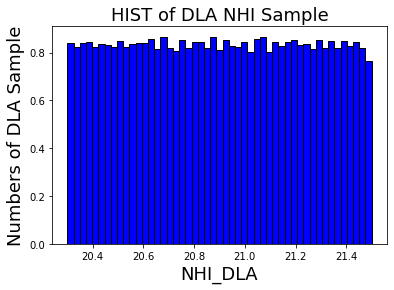

In [173]:
#draw histogram of NHI
plt.figure(figsize=(10,10))
plt.hist(nhisample,bins=49,color='blue',edgecolor='black',density=True)
plt.xlabel('NHI_DLA',fontsize=18)
plt.ylabel('Numbers of DLA Sample',fontsize=18)
plt.title('HIST of DLA NHI Sample',fontsize=18)
plt.savefig('Desktop/HISTofDLA NHI Sample.png')


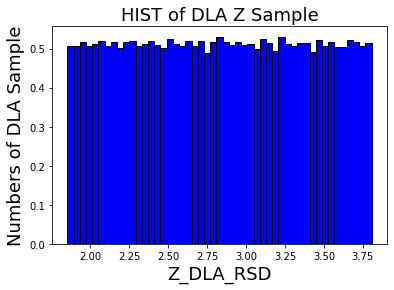

In [172]:
#draw histogram of Z with RSD
plt.figure(figsize=(10,10))
plt.hist(zsample,bins=49,color='blue',edgecolor='black',density=True)
plt.xlabel('Z_DLA_RSD',fontsize=18)
plt.ylabel('Numbers of DLA Sample',fontsize=18)
plt.title('HIST of DLA Z Sample',fontsize=18)
plt.savefig('Desktop/hist of DLA Z Sample.png')



In [181]:
#ks test uniform distribution
from scipy import stats
dist1=stats.uniform(20.3,1.2) # left edge = 0,width = 1
yy=dist1.rvs(6000)
dist2=stats.uniform(np.amin(zsample),np.ptp(zsample))
xx=dist2.rvs(6000)
print(stats.ks_2samp(nhisample,yy),stats.ks_2samp(zsample,xx))

Ks_2sampResult(statistic=0.01094000000000006, pvalue=0.5070942936147492) Ks_2sampResult(statistic=0.00929666666666662, pvalue=0.7121686192683931)
